<a href="https://colab.research.google.com/github/Rtniewi/kcwiertniewicz-IDS/blob/main/Assignment_2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//***Katrina Cwiertniewicz
//*** CSC 330
//9/26/2024
//Assignment 2: MLP Model
####The purpose of this assignment is to compare the performance of a simple Multi_Layer Perceptron (MLP) and a Convolutional Neural Network (CNN) using strides of the CIFAR-10 dataset.


In [ ]:
import numpy as no
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="parameters"></a>
CIFAR-10 dataset is loaded and noramlized by dividing by 255.0.

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## 2. Build the Model <a name="build"></a>
Dropout layers are added to the model to choose a random set of units (20%) from the preceding layers and set their output to 0. This is added to the model to prevent overfitting.

In [ ]:
def create_mlp_model(input_shape):
  input_shape = layers.Input((32, 32, 3))

  x = layers.Flatten()(input_shape)
  x = layers.Dense(200, activation="relu")(x)
  x = layers.Dense(150, activation="relu")(x)
  x = layers.Dropout(0.2)(x)

  output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

  model = models.Model(input_shape, output_layer)

  model.summary()
  return model

## 3. Train the model <a name="train"></a>
The model is compiled with an optimizer (adam) and loss function (sparse_categorical_crossentropy).


In [ ]:
model = create_mlp_model(input_shape=(32, 32, 3))
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

The MLP model is trained using the fit method and validation split of 20% to help prevent overfitting.

In [ ]:
model_evaluation= model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2486 - loss: 2.0388 - val_accuracy: 0.3619 - val_loss: 1.7724
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3695 - loss: 1.7590 - val_accuracy: 0.3853 - val_loss: 1.7204
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4061 - loss: 1.6763 - val_accuracy: 0.4229 - val_loss: 1.6439
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4211 - loss: 1.6237 - val_accuracy: 0.4324 - val_loss: 1.5939
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4314 - loss: 1.5896 - val_accuracy: 0.4280 - val_loss: 1.6111
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4495 - loss: 1.5391 - val_accuracy: 0.4584 - val_loss: 1.5451
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4572 - loss: 1.5166 - val_accuracy: 0.4578 - val_loss: 1.5334
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4606 -

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4729 - loss: 1.4805


[1.4882984161376953, 0.47189998626708984]

## 5. Plotting Results <a name="evaluate"></a>
Plotted MLP validation accuracy and training accuracy.

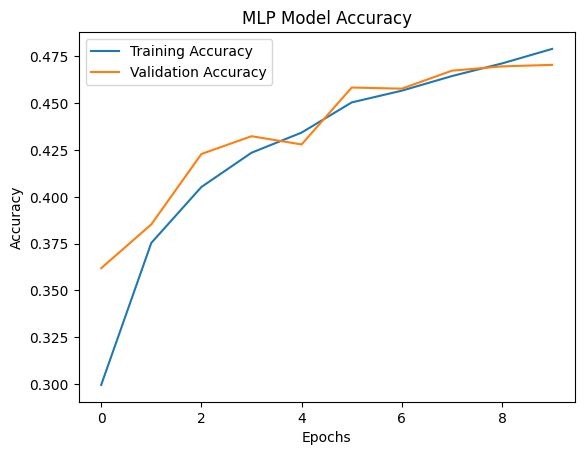

In [ ]:
plt.plot(model_evaluation.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_evaluation.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()